# Traffic Volume Prediction using XGBoost Regressor Algorithm

Citation:

The Metro Interstate Traffic Voume dataset is from the UCI Machine Learning Repository. 
https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume.

## Problem Definition

The objective of this project is to predict traffic volume on the Metro Interstate based on various factors that influence traffic patterns. Accurate traffic volume predictions can significantly benefit urban planning, traffic management, and transportation systems by providing insights for optimizing road usage and minimizing congestion.

**Goals**: 

*  Data Exploration: Understand the dataset by exploring its features and identifying patterns related to traffic volume.
*  Feature Selection: Determine which features of the dataset contribute most significantly to predicting traffic volume.
*  Model Development: Develop a robust regression model (using techniques like XGBoost) that accurately predicts traffic volume based on the selected features.
*  Performance Evaluation: Evaluate the model's performance using appropriate metrics such as Mean Absolute Error (MAE) and R-squared (R²).
*  Insights and Recommendations: Provide actionable insights based on the model's predictions to improve traffic management strategies.

**Target Variable**: The target variable or outcome is the `traffic_volume`.

#### Importing Required Libraries

In [470]:
from xgboost import XGBRegressor
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  

## Dataset Creation

In [471]:
df =pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


Attribute Information:

*  **holiday**              -&nbsp;        US National holidays plus regional holiday
*  **temp**                 -&nbsp;        Average temp in kelvin
*  **rain_1h**              -&nbsp;        Amount in mm of rain that occurred in the hour
*  **snow_1h**              -&nbsp;        Amount in mm of snow that occurred in the hour
*  **clouds_all**           -&nbsp;        Percentage of cloud cover
*  **weather_main**         -&nbsp;        Short textual description of the current weather
*  **weather_description**  -&nbsp;        Longer textual description of the current weather
*  **date_time**            -&nbsp;        Hour of the data collected in local CST time
*  **traffic_volume**       -&nbsp;        Hourly I-94 ATR 301 reported westbound traffic volume




#### Initial Data Preprocessing

* Looking at the Data Structure: info(), describe(), value_counts()
* Handling missing values
* Removing duplicates
* Converting categorical data into numerical form 
* Basic feature selection (removing irrelevant columns)

Make a copy of the dataset

In [472]:
df_copy = df.copy()

In [473]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [474]:
df_copy.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [475]:
df_copy['holiday'].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [476]:
df_copy['weather_main'].value_counts()

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [477]:
df_copy['weather_description'].value_counts()

weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain       

Remove duplicate rows

In [478]:
print(df_copy.duplicated().any())
print(df_copy.duplicated().sum())

True
17


In [479]:
df_copy.drop_duplicates(inplace=True)

Split the elements in the `date_time` column to get the `data and time_of_day` columns.

In [480]:
df_copy['Date'] = df_copy['date_time'].str.split(' ').str[0]
df_copy['Time_of_Day'] = df_copy['date_time'].str.split(' ').str[1]
df_copy.drop('date_time', axis=1, inplace=True)

# df_copy['Date'] = df_copy['date_time'].apply(lambda x: x.split(' ')).str[1]

df_copy.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Date,Time_of_Day
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00


check the unique values in the Date column to identify the formats present.

In [481]:
print(df_copy['Date'].unique())

['2012-10-02' '2012-10-03' '2012-10-04' ... '2018-09-28' '2018-09-29'
 '2018-09-30']


Remove any unwanted characters or leading/trailing spaces

In [482]:
df_copy['Date'] = df_copy['Date'].str.strip()

Since all the dates follow a specific format, we can specify that format directly while converting to date_time.

In [483]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%Y-%m-%d', errors='coerce')
print(df_copy['Date'].isna().sum())
print(df_copy['Date'].head())

0
0   2012-10-02
1   2012-10-02
2   2012-10-02
3   2012-10-02
4   2012-10-02
Name: Date, dtype: datetime64[ns]


Get the day of week, weekend, month, and the hour.

In [484]:
df_copy['Day_of_Week'] = df_copy['Date'].dt.day_of_week
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Is_Weekend'] = df_copy['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
df_copy['Time_of_Day'] = df_copy['Time_of_Day'].str.split(':').str[0]
df_copy['Time_of_Day'] = pd.to_numeric(df_copy['Time_of_Day'], errors='coerce')

df_copy.drop('Date', axis=1, inplace=True)

df_copy.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Time_of_Day,Day_of_Week,Month,Is_Weekend
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,9,1,10,0
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10,1,10,0
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11,1,10,0


In [485]:
print(df_copy['Day_of_Week'].unique())
print(df_copy['Month'].unique())
print(df_copy['Time_of_Day'].unique())
print(df_copy['Is_Weekend'].unique())

[1 2 3 4 5 6 0]
[10 11 12  1  2  3  4  5  6  7  8  9]
[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  8  7]
[0 1]


Replace `None/NaN` values in holiday column with `"No holiday"`.

In [486]:
df_copy['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [487]:
df_copy['holiday'].isna().sum()

48126

In [488]:
df_copy['holiday'] = df_copy['holiday'].fillna('No holiday')
df_copy['holiday'].value_counts()

holiday
No holiday                   48126
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: count, dtype: int64

In [489]:
df_copy.head(4)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Time_of_Day,Day_of_Week,Month,Is_Weekend
0,No holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,9,1,10,0
1,No holiday,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10,1,10,0
2,No holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11,1,10,0
3,No holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12,1,10,0


#### Exploratory Data Analysis (EDA)

* Visualize the data using histograms, scatter plots, box-plots etc.
* Identify `patterns, relationships, or outliers` in the data.
* Understand the `distribution of features, correlations, redundancy and multicollinearity` etc.
* Check for class imbalace.
* Feature engineering might be done based on insights from EDA (e.g., creating new features or transforming existing ones).

Let's check input features correlation with the target.

In [490]:
df_copy.select_dtypes(include=['number']).columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume',
       'Time_of_Day', 'Day_of_Week', 'Month', 'Is_Weekend'],
      dtype='object')

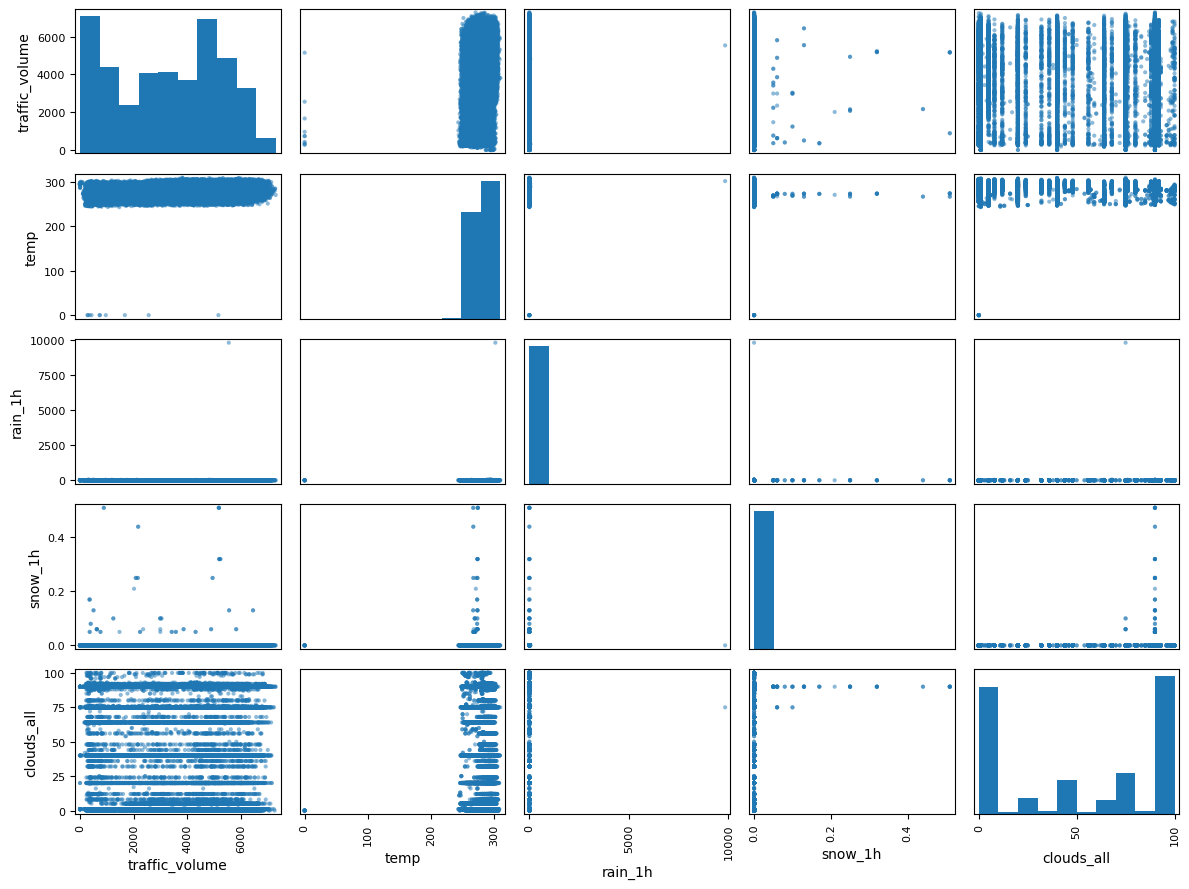

In [491]:
from pandas.plotting import scatter_matrix

columns1 = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']

scatter_matrix(df_copy[columns1], figsize=(12, 9))
plt.tight_layout()
plt.show()

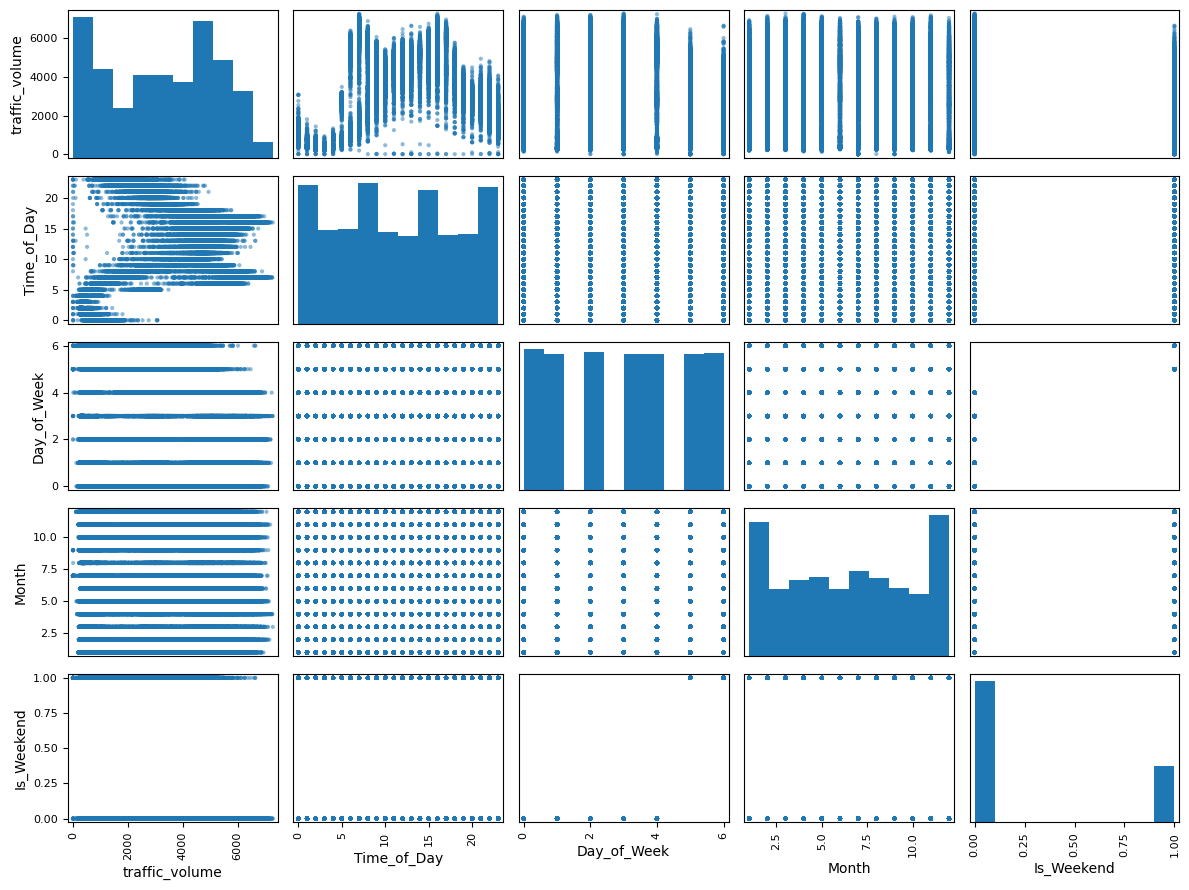

In [492]:
columns2 = ['traffic_volume', 'Time_of_Day', 'Day_of_Week', 'Month', 'Is_Weekend']

scatter_matrix(df_copy[columns2], figsize=(12, 9))
plt.tight_layout()
plt.show()

Let's look at correlation metrics

In [493]:
corr_matrix = df_copy.corr(numeric_only=True)
print(corr_matrix['traffic_volume'].sort_values(ascending=False))

traffic_volume    1.000000
Time_of_Day       0.352300
temp              0.130161
clouds_all        0.067138
rain_1h           0.004715
snow_1h           0.000736
Month            -0.002480
Day_of_Week      -0.149551
Is_Weekend       -0.218533
Name: traffic_volume, dtype: float64


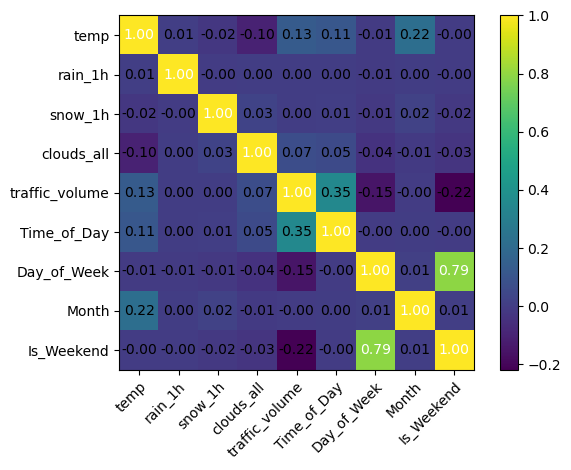

In [494]:
import numpy as np
from mlxtend.plotting import heatmap

all_num = df_copy.select_dtypes(include=['number'])

cm = np.corrcoef(all_num.values.T)
hm = heatmap(cm, row_names=all_num.columns, column_names=all_num.columns)

plt.tight_layout()
plt.show()

There is no substantial correlation between the features.

We will visualize the distributions of numeric features

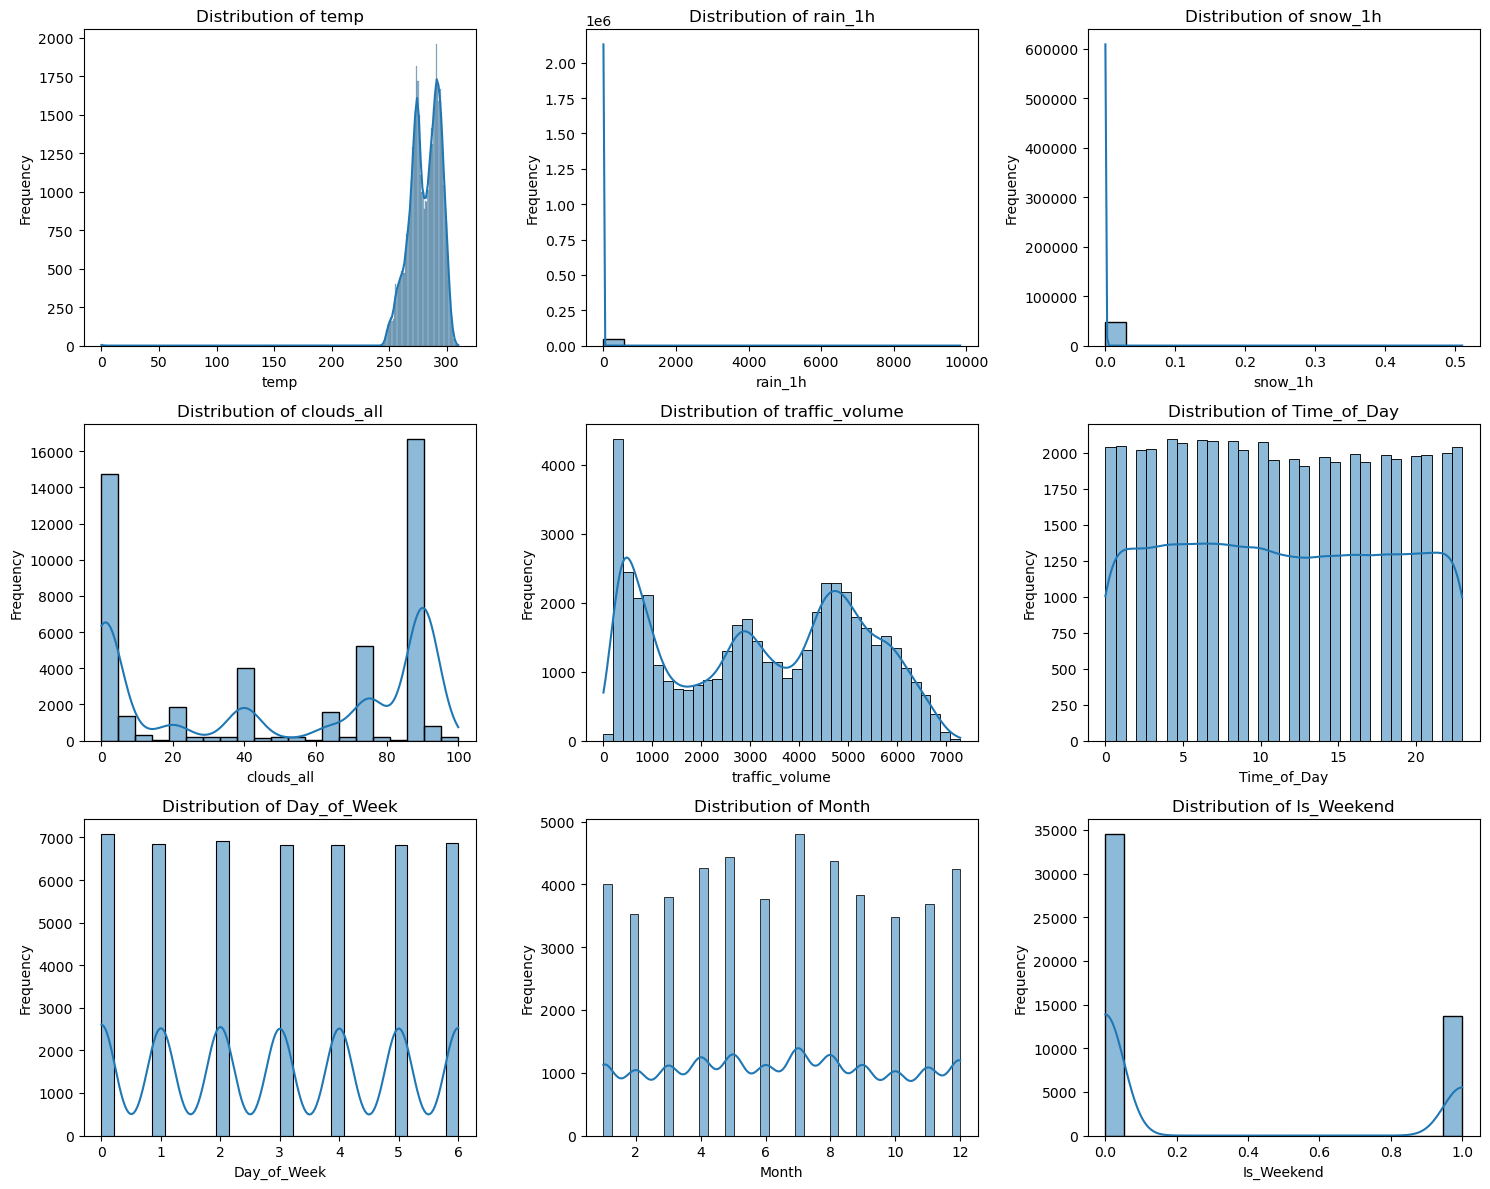

In [495]:
import seaborn as sns

numeric_columns = df_copy.select_dtypes(include=['number']).columns
n_cols = 3 
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_copy[column], kde=True)  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Further Preprocessing

* Dealing with `outliers` found during EDA.
* Feature engineering
* Scaling/normalizing and creating pipeline.

Check for outliers

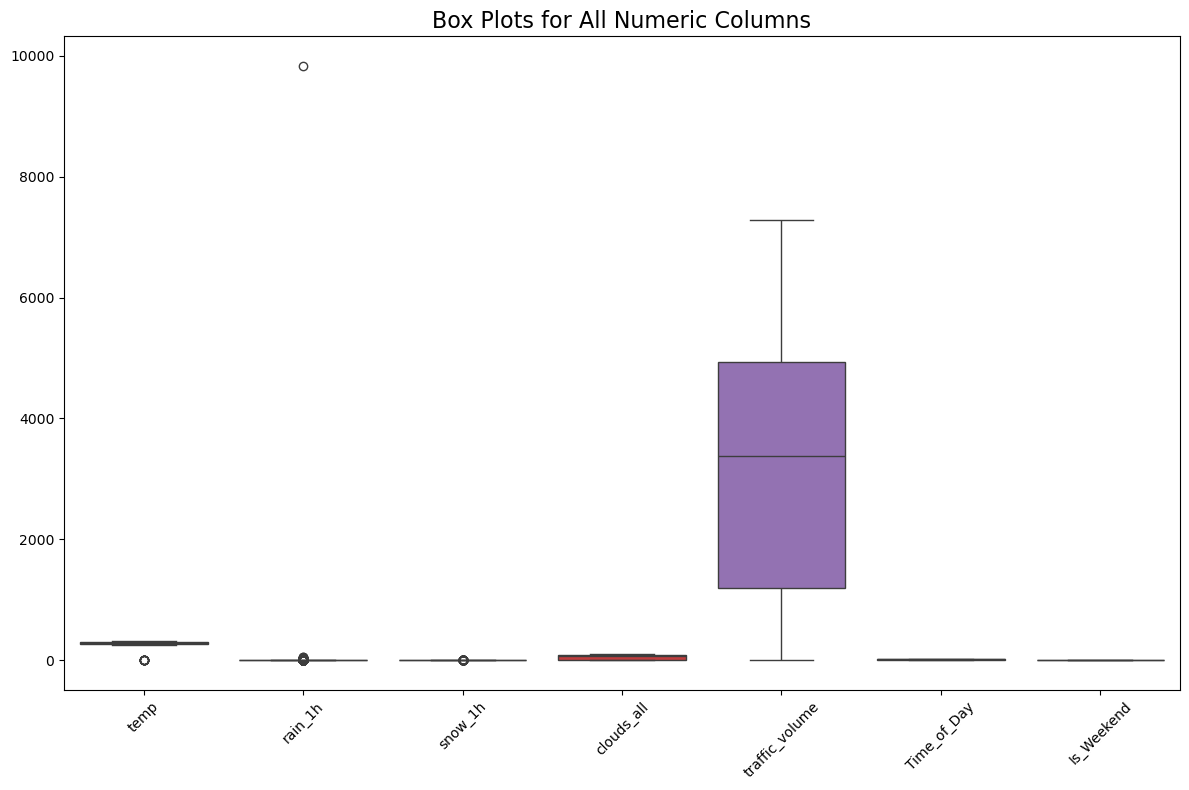

In [496]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_copy.select_dtypes(include=['float', 'int64']))
plt.title('Box Plots for All Numeric Columns', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that there are outliers in `rain_1h and temp`. Let's look at these outliers.

In [497]:
num_col = df_copy.select_dtypes(include=['number']).columns

for col in num_col:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)].shape[0]
    upper_bound_outliers = df_copy[(df_copy[col] > upper_bound)].shape[0]
    print(f"Number of outliers in {col}: {num_outliers}")

    # Use `Imputation` to replace outlier values with the median of the non-outlier values.
    if num_outliers > 0:
        median_column = df_copy[col].median()
        df_copy.loc[df_copy[col] > upper_bound, col] = median_column
        print(f'{upper_bound_outliers} outliers has been replaced with the median of {col} column.')
        

Number of outliers in temp: 10
0 outliers has been replaced with the median of temp column.
Number of outliers in rain_1h: 3467
3467 outliers has been replaced with the median of rain_1h column.
Number of outliers in snow_1h: 63
63 outliers has been replaced with the median of snow_1h column.
Number of outliers in clouds_all: 0
Number of outliers in traffic_volume: 0
Number of outliers in Time_of_Day: 0
Number of outliers in Day_of_Week: 0
Number of outliers in Month: 0
Number of outliers in Is_Weekend: 0


Time to create pipeline to handle both numerical and categorical values.

In [498]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Create a pipeline for numerical attributes
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

# Create a pipeline for categorical attributes
cat_pipeline = Pipeline([   
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
    ])

num_input_attribs = df_copy.select_dtypes(include=['int64', 'float64'])
num_attribs = num_input_attribs.drop('traffic_volume', axis=1).columns # Drop the target variable
cat_attribs = df_copy.select_dtypes(include=['object', 'category']).columns

# Combine the numerical and categorical pipelines using ColumnTransformer
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

#### Train-Test Split

* Splitting the dataset into training and test sets.
* Training set: 70-80% of the dataset
* Testing set: 20-30% of the dataset.

In [499]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('traffic_volume', axis=1)
y = df_copy['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [500]:
X_train_std = preprocess_pipeline.fit_transform(X_train)
X_train_std

array([[ 0.95485208,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.5892203 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09165819,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.4247015 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.90747175,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17083935,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Show our transformed train set in dataframe.

In [501]:
def get_feature_names(data):
    df_prepared = pd.DataFrame(
        data,
        columns=preprocess_pipeline.get_feature_names_out(),
        index=X_train.index)
    return df_prepared

df_prepared = get_feature_names(X_train_std)
df_prepared.head(5)

,num__temp,num__rain_1h,num__snow_1h,num__clouds_all,num__Time_of_Day,num__Is_Weekend,cat__holiday_Christmas Day,cat__holiday_Columbus Day,cat__holiday_Independence Day,cat__holiday_Labor Day,...,cat__weather_description_sleet,cat__weather_description_smoke,cat__weather_description_snow,cat__weather_description_thunderstorm,cat__weather_description_thunderstorm with drizzle,cat__weather_description_thunderstorm with heavy rain,cat__weather_description_thunderstorm with light drizzle,cat__weather_description_thunderstorm with light rain,cat__weather_description_thunderstorm with rain,cat__weather_description_very heavy rain
17936,0.954852,0.0,0.0,1.043361,-0.349409,-0.631117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35285,1.589220,0.0,0.0,0.658590,0.658705,-0.631117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31165,0.091658,0.0,0.0,0.479031,1.234770,-0.631117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45457,1.200292,0.0,0.0,-1.239612,-1.645555,1.584492,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15578,1.032638,0.0,0.0,-1.239612,1.378786,-0.631117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [502]:
y_train

17936    5453
35285    6673
31165    2367
45457    1314
15578    3054
         ... 
11284    5761
44748    3018
38171     427
860      2057
15795    4385
Name: traffic_volume, Length: 33730, dtype: int64

## Model Selection 

In [503]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

pipeline = make_pipeline(preprocess_pipeline, 
                         XGBRegressor())  

## Model Training

* Train a basic model without tuning any hyperparameters to establish a `baseline performance`.
* Fit the model to the entire training set

In [504]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'Time_of_Day',
       'Is_Weekend'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   O...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

## Model Assesment

* Evaluate on both training and test set.
* Cross-validation to evaluate model performance.
* Evaluate using MAE, MSE, RMSE and R2.
* Compare `training errors` and `test errors` to detect `overfitting or underfitting`.
* Compare `test errors` and `cross-validation errors` to provide `better measures of generalization`.
* Compare and evaluate the target variable `range and scale` against the errors.
* Plot and visualize `learning curves`.

In [505]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# 1. KFold setup (for regression tasks, use KFold instead of StratifiedKFold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(root_mean_squared_error),
    'R2': make_scorer(r2_score)
}

# 2. Train predictions and evaluation using MAE, MSE, RMSE, and R-squared
y_train_pred = pipeline.predict(X_train)

# Calculate MAE, MSE, RMSE, and R-squared for training data
training_mae = mean_absolute_error(y_train, y_train_pred)
training_mse = mean_squared_error(y_train, y_train_pred)
training_rmse = root_mean_squared_error(y_train, y_train_pred)
training_r2 = r2_score(y_train, y_train_pred)

# Print training metrics
print(f'Training MAE: {training_mae:.4f}')
print(f'Training MSE: {training_mse:.4f}')
print(f'Training RMSE: {training_rmse:.4f}')
print(f'Training R²: {training_r2:.4f}')

# 3. Cross-Validation using KFold and multiple metrics
cv_results = cross_validate(pipeline, X_train, y_train, cv=kf, scoring=scoring, return_train_score=False)

# Print cross-validation metrics
print("\nCross-Validation Results:")
print(f"Mean Cross-Validation MAE: {cv_results['test_MAE'].mean():.4f}")
print(f"Mean Cross-Validation MSE: {cv_results['test_MSE'].mean():.4f}")
print(f"Mean Cross-Validation RMSE: {cv_results['test_RMSE'].mean():.4f}")
print(f"Mean Cross-Validation R²: {cv_results['test_R2'].mean():.4f}")

# 4. Test predictions and evaluation using MAE, MSE, RMSE, and R-squared
y_test_pred = pipeline.predict(X_test)

# Calculate MAE, MSE, RMSE, and R-squared for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print test metrics
print("\nTest Results:")
print(f'Test MAE: {test_mae:.4f}')
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test R²: {test_r2:.4f}')

# 5. Overfitting and Generalization Check
if training_rmse > cv_results['test_RMSE'].mean() and training_rmse > test_rmse:
    print("\nOverfitting Detected: The model performs much better on training data than on validation or test data.")
elif test_rmse < cv_results['test_RMSE'].mean():
    print("\nUnderfitting Detected: The model performs better on test data than on validation.")
else:
    print("\nModel is Generalizing Well: Consistent performance on training, validation, and test data.")

# 6. Range and Scale of Target Variable
target_values = y_train  # Assuming the training set contains the full target variable

# Calculate the range and scale of the target variable
target_range = target_values.max() - target_values.min()
target_mean = target_values.mean()

print(f"\nRange of Target Variable: {target_range:.2f}")
print(f"Mean of Target Variable (Scale): {target_mean:.2f}")

# 7. Final Evaluation Summary
print(f"\nError Summary Compared to Target Range and Scale:")
print(f"Training RMSE is {training_rmse / target_range * 100:.2f}% of the target range.")
print(f"Test RMSE is {test_rmse / target_range * 100:.2f}% of the target range.")
print(f"Training RMSE is {training_rmse / target_mean * 100:.2f}% of the target scale (mean).")
print(f"Test RMSE is {test_rmse / target_mean * 100:.2f}% of the target scale (mean).")


Training MAE: 297.0678
Training MSE: 225377.5146
Training RMSE: 474.7394
Training R²: 0.9426

Cross-Validation Results:
Mean Cross-Validation MAE: 330.5026
Mean Cross-Validation MSE: 283426.1001
Mean Cross-Validation RMSE: 532.0891
Mean Cross-Validation R²: 0.9277

Test Results:
Test MAE: 318.6811
Test MSE: 255311.6694
Test RMSE: 505.2838
Test R²: 0.9362

Underfitting Detected: The model performs better on test data than on validation.

Range of Target Variable: 7280.00
Mean of Target Variable (Scale): 3258.63

Error Summary Compared to Target Range and Scale:
Training RMSE is 6.52% of the target range.
Test RMSE is 6.94% of the target range.
Training RMSE is 14.57% of the target scale (mean).
Test RMSE is 15.51% of the target scale (mean).


## Model Optimization

* Use `GridSearchCV` or `RandomSearchCV` to find the optimal combination of hyperparameters.
* Evaluate final Model: Generate and examine the `final errors comparison`.


In [506]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

# Define the parameter grid for XGBRegressor
param_grid = {
    'xgbregressor__n_estimators': [100, 200],
    'xgbregressor__max_depth': [10, 20, None],
    'xgbregressor__min_child_weight': [1, 5, 10],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2],
    'xgbregressor__subsample': [0.8, 1.0]
}

# Create the GridSearchCV object for regression
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Output best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best RMSE from Grid Search:", -grid_search.best_score_)  # Negate to get the positive RMSE

# Get the best model and fit it
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_xgb_model.predict(X_test)

# Calculate and print evaluation metrics for regression
print("Test MAE:", mean_absolute_error(y_test, y_pred_best))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred_best)) 
print("R² Score on Test Data:", r2_score(y_test, y_pred_best))


Residual Plot

In [507]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test are the actual values and y_pred are the predicted values
y_pred = best_xgb_model.predict(X_test)  # Use your best model to predict
residuals = y_test - y_pred  # Calculate residuals

plt.figure(figsize=(6, 4))

# Scatter plot of residuals
sns.scatterplot(x=y_pred, y=residuals)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


Check feature importances.

In [508]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train_std, y_train)

importances = rf.feature_importances_

df_prepared = get_feature_names(X_train_std)
df_prepared.columns

for index, column in enumerate(df_prepared.columns):
    column = column.split('__')[1]
    print(f'Feature {index + 1}: {column}')

Feature 1: temp
Feature 2: rain_1h
Feature 3: snow_1h
Feature 4: clouds_all
Feature 5: Time_of_Day
Feature 6: Is_Weekend
Feature 7: holiday_Christmas Day
Feature 8: holiday_Columbus Day
Feature 9: holiday_Independence Day
Feature 10: holiday_Labor Day
Feature 11: holiday_Martin Luther King Jr Day
Feature 12: holiday_Memorial Day
Feature 13: holiday_New Years Day
Feature 14: holiday_No holiday
Feature 15: holiday_State Fair
Feature 16: holiday_Thanksgiving Day
Feature 17: holiday_Veterans Day
Feature 18: holiday_Washingtons Birthday
Feature 19: weather_main_Clear
Feature 20: weather_main_Clouds
Feature 21: weather_main_Drizzle
Feature 22: weather_main_Fog
Feature 23: weather_main_Haze
Feature 24: weather_main_Mist
Feature 25: weather_main_Rain
Feature 26: weather_main_Smoke
Feature 27: weather_main_Snow
Feature 28: weather_main_Squall
Feature 29: weather_main_Thunderstorm
Feature 30: weather_description_SQUALLS
Feature 31: weather_description_Sky is Clear
Feature 32: weather_description

Make prediction on an unseen data.

In [509]:
import pandas as pd
unseen_data = pd.read_csv('unseen_data.csv')
unseen_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Time_of_Day,Day_of_Week,Month,Is_Weekend
0,No holiday,340.6,0.01,0.01,51,Haze,light snow,11,4,7,0
1,Labor Day,431.4,0.01,1.00,66,Mist,light rain,12,5,5,0


In [510]:
# Predict Traffic Volume on the two instances
new_pred = best_xgb_model.predict(unseen_data)
print(new_pred)

[5258.6724 4928.7114]


## Documentation

* Document the workflow, including the rationale for data preprocessing choices, model performance metrics, and any tuning steps you performed. Ensure reproducibility.